In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package.utils import ARIMAPredict
from package.utils import Evalutaion

#### 加载数据

In [70]:
ts = pd.read_csv('../result/leaves/leaves_KPISet_smothing/i06&e10&c5&p11&l4.csv')
colName = 'true'
ts1 = ts[colName][:2016].tolist()
ts2 = ts[colName][2016:].tolist()

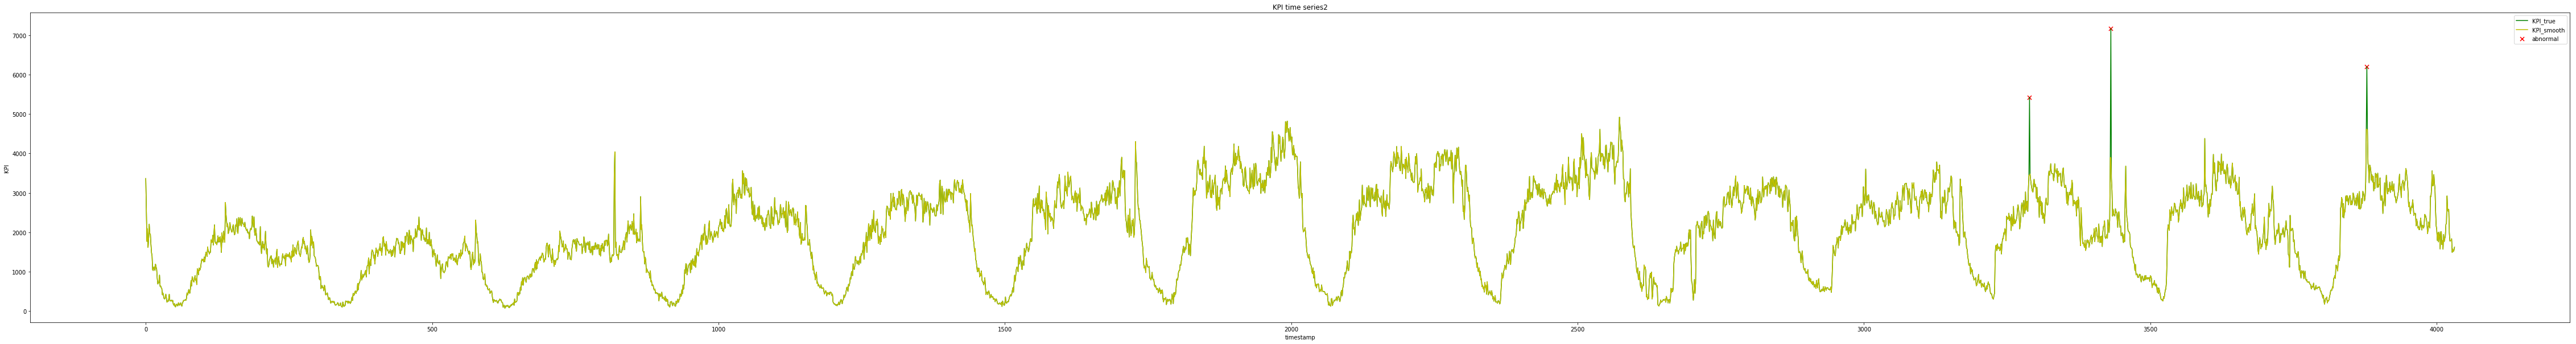

In [72]:
# 第二阶段总KPI
plt.figure(figsize=(80, 10))
plt.xlabel('timestamp')
plt.ylabel('KPI')
plt.title('KPI time series2')
plt.plot(ts['true'], 'g', label='KPI_true')
plt.plot(ts['smoothed'], 'y', label='KPI_smooth')
plt.scatter(ts[ts['label'] == 1].index,
            ts[ts['label'] == 1]['true'],
            s=50, marker='x', color='red', label='abnormal')
plt.legend(loc='best')
plt.show()

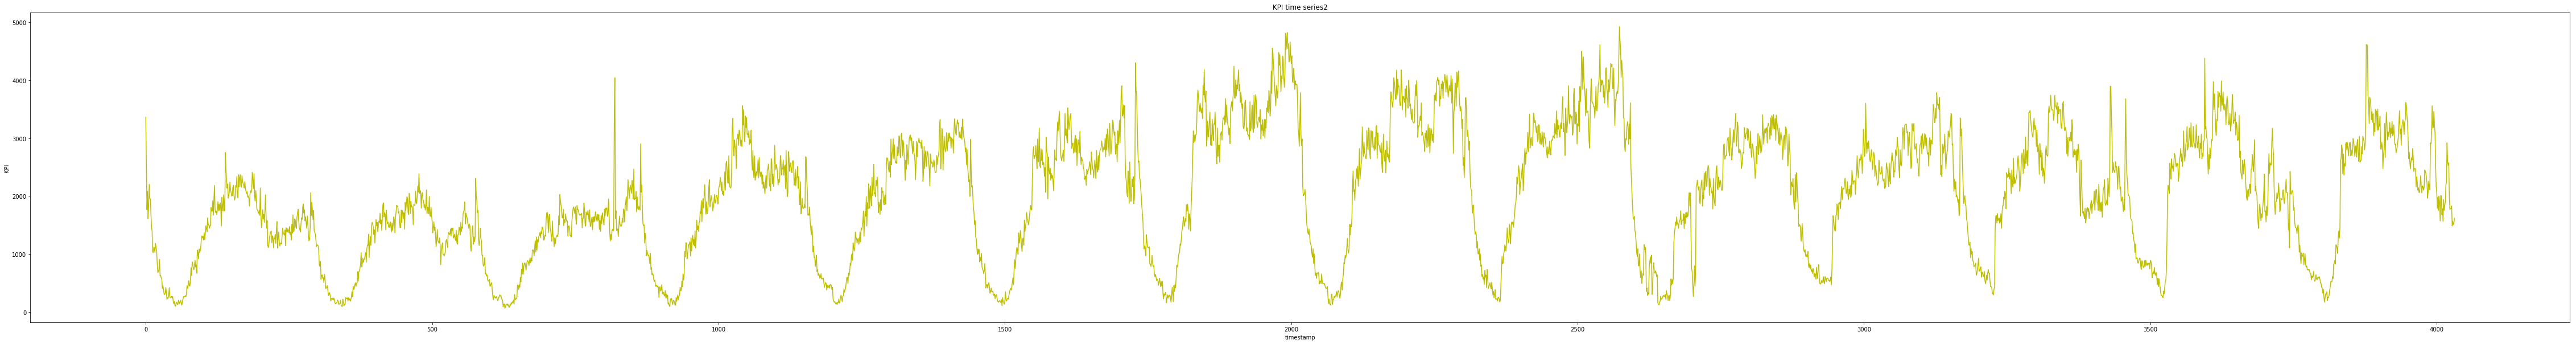

In [73]:
plt.figure(figsize=(80, 10))
plt.xlabel('timestamp')
plt.ylabel('KPI')
plt.title('KPI time series2')
plt.plot(ts['smoothed'], 'y', label='KPI_smoothed')
plt.show()

In [74]:
d = stationarity_test(ts['smoothed'], True)

原始序列经过0阶差分后归于平稳，p值为0.000000


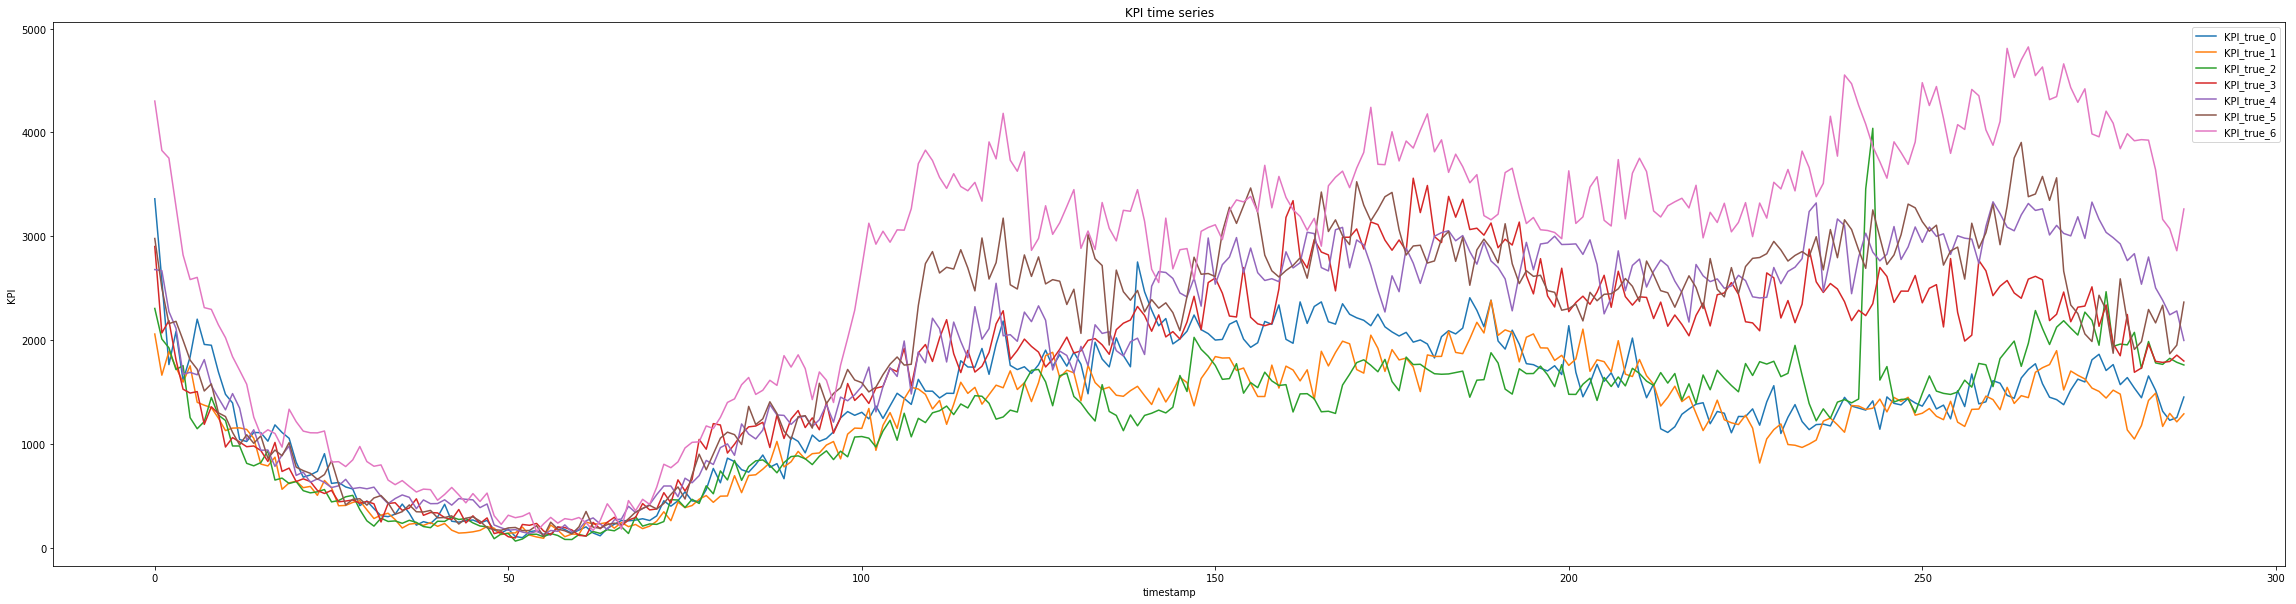

In [75]:
# 第二阶段总KPI
plt.figure(figsize=(40, 10))
plt.xlabel('timestamp')
plt.ylabel('KPI')
plt.title('KPI time series')
for i in range(7):
    plt.plot(ts['true'][i*288:i*288+288].tolist(), label='KPI_true_%d' % i)

plt.legend(loc='best')
plt.show()

In [76]:
ts1 = ts['true'][:2016].tolist()
ts2 = ts['true'][2016:].tolist()
ts1_smooth = ts['smoothed'][:2016].tolist()
ts2_smooth = ts['smoothed'][2016:].tolist()

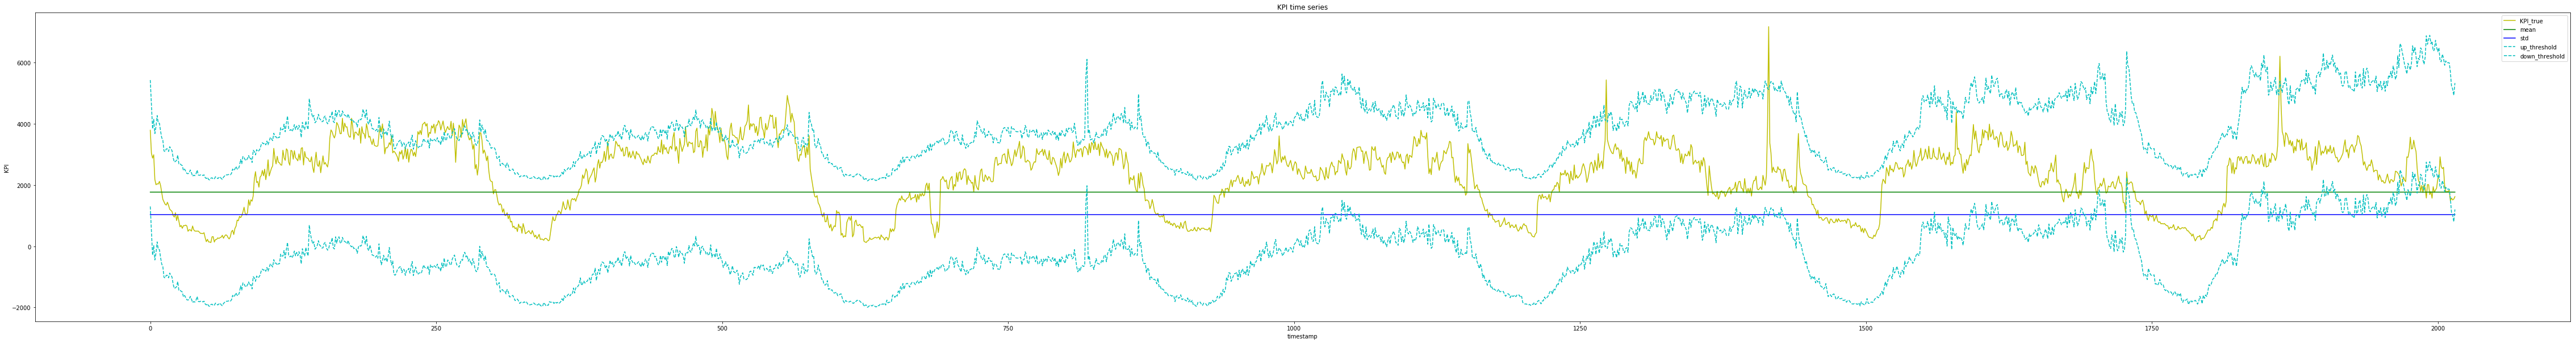

In [77]:
mean = [np.mean(ts1)] * len(ts1)
std = [np.std(ts1)] * len(ts1)
up_threshold = np.array(ts1) + np.array(std) * 2
down_threshold = np.array(ts1) - np.array(std) * 2
plt.figure(figsize=(80, 10))
plt.xlabel('timestamp')
plt.ylabel('KPI')
plt.title('KPI time series')
plt.plot(ts2, 'y', label='KPI_true')
plt.plot(mean, 'g', label='mean')
plt.plot(std, 'b', label='std')
plt.plot(up_threshold, '--c', label='up_threshold')
plt.plot(down_threshold, '--c', label='down_threshold')
plt.legend()
plt.show()

In [78]:
ts['true'][:2016].to_csv('../result/ts_true_1.csv')
ts['true'][2016:].to_csv('../result/ts_true_2.csv')

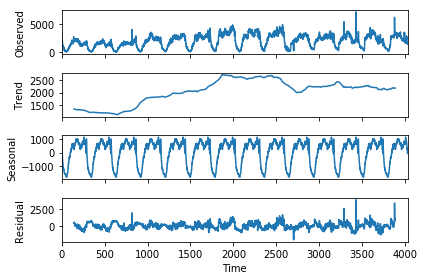

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts['true'].tolist(), freq=288, two_sided=True)
# self.ts:时间序列，series类型; 
# freq:周期，这里为1440分钟，即一天; 
# two_sided:观察下图2、4行图，左边空了一段，如果设为True，则会出现左右两边都空出来的情况，False保证序列在最后的时间也有数据，方便预测。

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()
plt.show()

WEIGHTS [ 0.25  0.25  0.25  0.25]


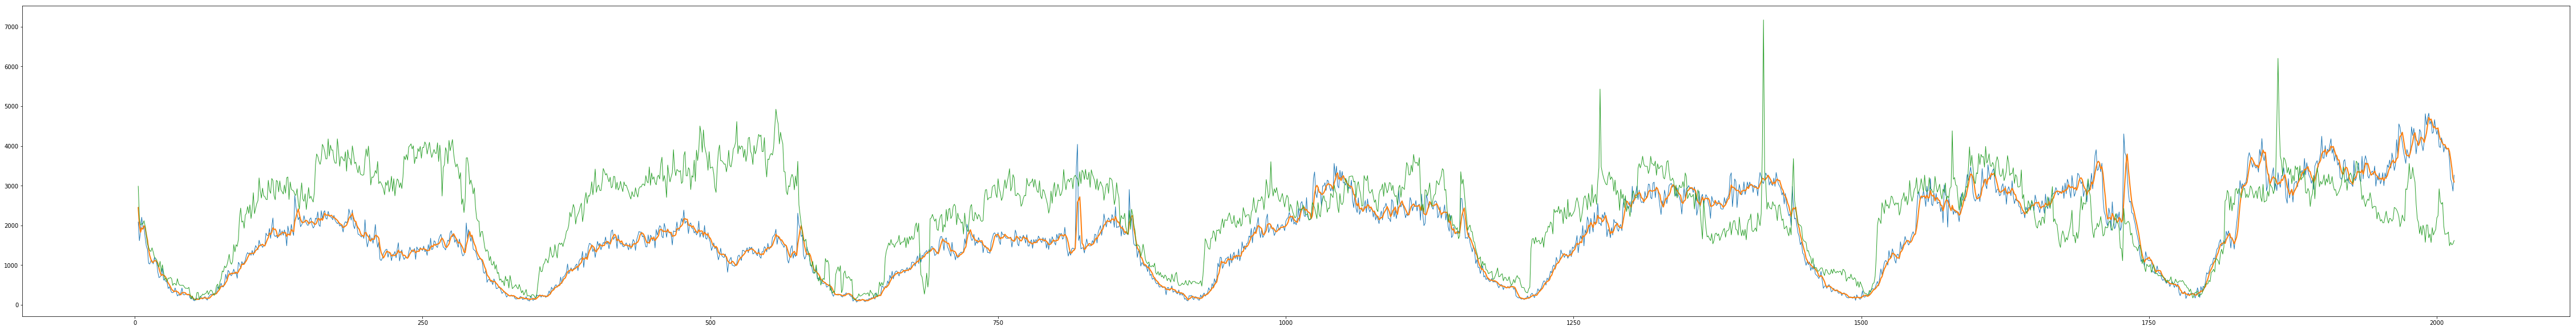

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import sys

N=4
weights=np.ones(N)/N
print("WEIGHTS",weights)

c = ts1
sam=np.convolve(weights,c)[N-1:-N+1]
t=np.arange(N-1,len(c))

plt.figure(figsize=(80, 10))
plt.plot(t,c[N-1:],lw=1.0)
plt.plot(t,sam,lw=2.0)
plt.plot(t,ts2[N-1:],lw=1.0)
plt.show()

MAE 847.643194237


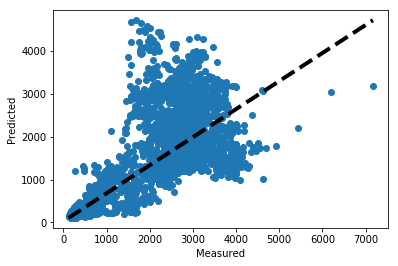

In [81]:
eva = Evalutaion()
eva.evaluate(ts2[N-1:], sam, 'MAE')
eva.visualize(ts2[N-1:], sam)

MAE 852.164186508


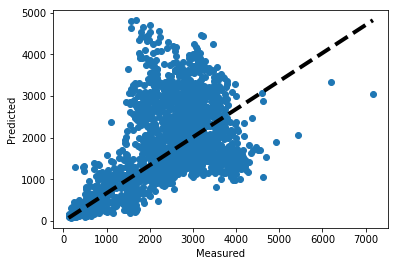

In [82]:
eva = Evalutaion()
eva.evaluate(ts2, ts1, 'MAE')
eva.visualize(ts2, ts1)